<a href="https://colab.research.google.com/github/AmantayAbdurakhmanov/misc/blob/master/50_Lines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original idea by https://gist.github.com/u-ndefine/8e4bc21be4275f87fefe7b2a68487161

Saving Keanu.png to Keanu.png


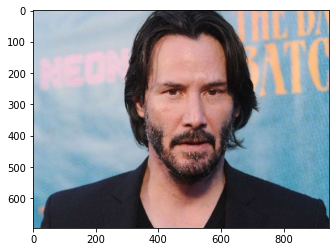

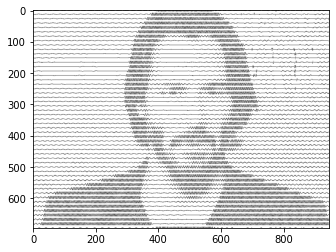

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

#setup
lines_num = 50
lines_amp = 5

def decel(x):
  return 1 - (x-1)*(x-1)

uploaded = files.upload()
for k, v in uploaded.items():
    inp_img = plt.imread(k)
plt.imshow(inp_img)
plt.show()

inp_shape = inp_img.shape
out_img = np.ones(inp_shape)
for line in range(0, lines_num):
  l=0
  y = int(line*inp_shape[0]/lines_num)
  for x in range(0, inp_shape[1]):
    # m = 1-"the most intense color". It can be particular color only (e.g. red - inp_img[y, x, 0])
    m = np.max(inp_img[y, x])
    if m < 1: # *.png
      m = 1 - m
    else: #*.jpeg
      m = 1 - m/255 

    for s in range(0, lines_amp + 1):      
      out_img[min(y + int(np.sin(l * np.pi/2.) * lines_amp * decel(m)), inp_shape[0] - 1), x] = 0
      l+=m/lines_amp

plt.imshow(out_img)
plt.imsave('{}_lines_{}'.format(lines_num, k),out_img)
plt.show()